#Algorithmic Approaches to Graph Matchings and Perfect Matchings

In [26]:
!pip install networkx numpy matplotlib

In [27]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

# Helper function to visualize graphs
def draw_graph(G, matching=None, edge_labels=None):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray")
    if matching:
        nx.draw_networkx_edges(G, pos, edgelist=matching, edge_color="red", width=2)
    if edge_labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

In [28]:
# Random graph
def generate_random_graph(n, p):
    return nx.gnp_random_graph(n, p)

# Bipartite graph
def generate_bipartite_graph(n1, n2, p):
    return nx.bipartite.random_graph(n1, n2, p)

# Complete graph
def generate_complete_graph(n):
    return nx.complete_graph(n)

In [29]:
# Greedy Matching
def greedy_matching(G):
    matching = set()
    visited = set()
    for u, v in G.edges():
        if u not in visited and v not in visited:
            matching.add((u, v))
            visited.add(u)
            visited.add(v)
    return matching

# Hopcroft-Karp for Bipartite Graphs
def hopcroft_karp(G):
    return nx.bipartite.hopcroft_karp_matching(G)

# Edmonds' Blossom Algorithm for General Graphs
def edmonds_blossom(G):
    return nx.max_weight_matching(G)

In [35]:
# Benchmark algorithm
def benchmark_algorithm(G, algorithm):
    start_time = time.time()
    matching = algorithm(G)
    runtime = time.time() - start_time
    return matching, runtime

Greedy Matching found in 0.0000s


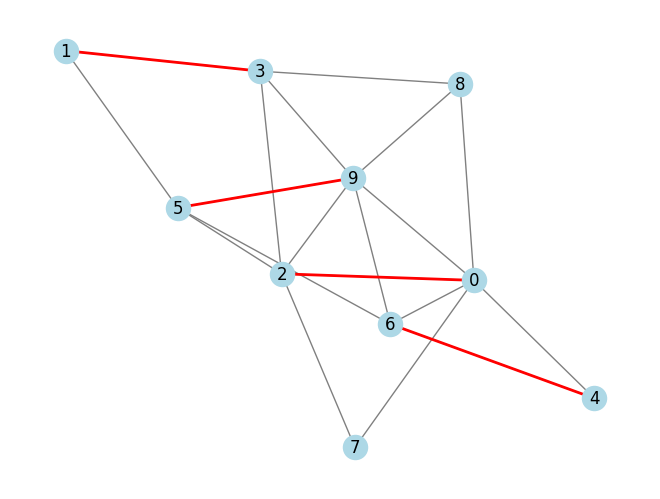

In [36]:
# Example usage
G = generate_random_graph(10, 0.5)
matching, runtime = benchmark_algorithm(G, greedy_matching)
print(f"Greedy Matching found in {runtime:.4f}s")
draw_graph(G, matching)

In [37]:
def validate_maximum_matching(G, matching):
    # Convert matching to a graph
    matching_graph = nx.Graph()
    matching_graph.add_edges_from(matching)

    # Check if the matching graph is a subset of the input graph
    if not matching_graph.edges() <= G.edges():
        return False

    # Check if no two edges in the matching share a vertex
    vertices = set()
    for u, v in matching:
        if u in vertices or v in vertices:
            return False
        vertices.add(u)
        vertices.add(v)
    return True

In [38]:
# Check for perfect matching
def is_perfect_matching(G, matching):
    return len(matching) * 2 == len(G.nodes())

In [39]:
# Convert dictionary to edge set
def dict_to_edge_set(matching_dict):
    edge_set = set()
    for u, v in matching_dict.items():
        if u < v:
            edge_set.add((u, v))
    return edge_set

In [40]:
# Check if graph is bipartite
def is_bipartite_graph(G):
    try:
        nx.algorithms.bipartite.color(G)
        return True
    except nx.NetworkXError:
        return False

In [41]:
# Generate a bipartite graph with an even number of nodes
G_bipartite = generate_bipartite_graph(5, 5, 0.8)

# Run Hopcroft-Karp
matching_hopcroft, runtime_hopcroft = benchmark_algorithm(G_bipartite, hopcroft_karp)
matching_hopcroft_edges = dict_to_edge_set(matching_hopcroft)

# Check if it is a perfect or maximum matching
print(f"Hopcroft-Karp Matching: {matching_hopcroft_edges}, Runtime: {runtime_hopcroft:.4f}s")
print("Is Perfect Matching:", is_perfect_matching(G_bipartite, matching_hopcroft_edges))
print("Is Maximum Matching:", validate_maximum_matching(G_bipartite, matching_hopcroft_edges))

Hopcroft-Karp Matching: {(3, 8), (2, 7), (4, 9), (0, 5), (1, 6)}, Runtime: 0.0003s
Is Perfect Matching: True
Is Maximum Matching: True


In [42]:
def visualize_matching(G, matching):
    # If matching is a dictionary, convert it to an edge set
    if isinstance(matching, dict):
        matching = dict_to_edge_set(matching)

    # Draw the graph and highlight the matching edges
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray")
    nx.draw_networkx_edges(G, pos, edgelist=matching, edge_color="red", width=2)
    plt.show()

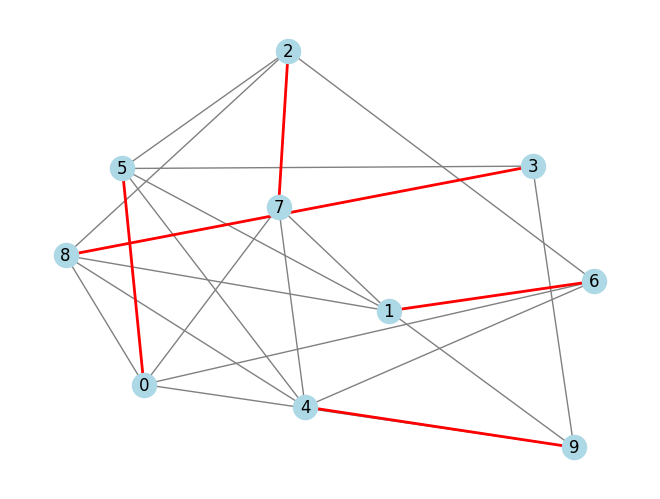

In [43]:
# Convert Hopcroft-Karp result to an edge set
matching_hopcroft_edges = dict_to_edge_set(matching_hopcroft)

# Visualize the matching
visualize_matching(G_bipartite, matching_hopcroft_edges)

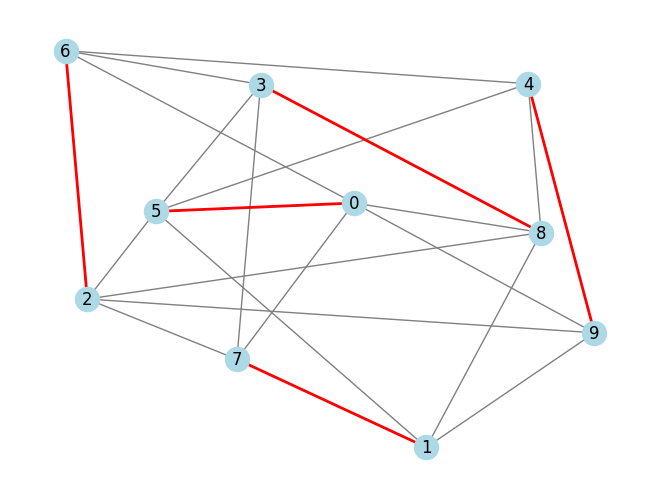

In [44]:
# Generate a bipartite graph
G_bipartite = generate_bipartite_graph(5, 5, 0.8)

# Run Hopcroft-Karp
matching_hopcroft, runtime_hopcroft = benchmark_algorithm(G_bipartite, hopcroft_karp)

# Convert dictionary result to edge set
matching_hopcroft_edges = dict_to_edge_set(matching_hopcroft)

# Visualize the matching
visualize_matching(G_bipartite, matching_hopcroft_edges)

In [45]:
# Initialize results storage
results = []

for graph_type in ["random", "bipartite", "complete"]:
    for size in [10, 20, 50]:
        print(f"Generating {graph_type} graph of size {size}")
        if graph_type == "random":
            G = generate_random_graph(size, 0.5)
        elif graph_type == "bipartite":
            G = generate_bipartite_graph(size // 2, size // 2, 0.8)
        else:  # complete graph
            G = generate_complete_graph(size)

        for algorithm, name in [
            (greedy_matching, "Greedy"),
            (hopcroft_karp, "Hopcroft-Karp"),
            (edmonds_blossom, "Edmonds")
        ]:
            if name == "Hopcroft-Karp" and graph_type != "bipartite":
                print(f"Skipping {name} for {graph_type} graph")
                continue

            print(f"Running {name} on {graph_type} graph of size {size}")
            try:
                matching, runtime = benchmark_algorithm(G, algorithm)
                print(f"Algorithm {name} completed: Runtime = {runtime:.4f}s")
                results.append({
                    "Graph Type": graph_type,
                    "Size": size,
                    "Algorithm": name,
                    "Matching Size": len(matching),
                    "Is Perfect": is_perfect_matching(G, matching),
                    "Runtime (s)": runtime
                })
            except Exception as e:
                print(f"Error for {name} on {graph_type} graph of size {size}: {e}")

Generating random graph of size 10
Running Greedy on random graph of size 10
Algorithm Greedy completed: Runtime = 0.0001s
Skipping Hopcroft-Karp for random graph
Running Edmonds on random graph of size 10
Algorithm Edmonds completed: Runtime = 0.0004s
Generating random graph of size 20
Running Greedy on random graph of size 20
Algorithm Greedy completed: Runtime = 0.0001s
Skipping Hopcroft-Karp for random graph
Running Edmonds on random graph of size 20
Algorithm Edmonds completed: Runtime = 0.0010s
Generating random graph of size 50
Running Greedy on random graph of size 50
Algorithm Greedy completed: Runtime = 0.0002s
Skipping Hopcroft-Karp for random graph
Running Edmonds on random graph of size 50
Algorithm Edmonds completed: Runtime = 0.0035s
Generating bipartite graph of size 10
Running Greedy on bipartite graph of size 10
Algorithm Greedy completed: Runtime = 0.0000s
Running Hopcroft-Karp on bipartite graph of size 10
Algorithm Hopcroft-Karp completed: Runtime = 0.0004s
Running

In [46]:
for algorithm, name in [
    (greedy_matching, "Greedy"),
    (hopcroft_karp, "Hopcroft-Karp"),
    (edmonds_blossom, "Edmonds")
]:
    if name == "Hopcroft-Karp" and graph_type != "bipartite":
        continue

    try:
        matching, runtime = benchmark_algorithm(G, algorithm)
        print(f"Appending result for {name} on {graph_type} graph")
        results.append({
            "Graph Type": graph_type,
            "Size": size,
            "Algorithm": name,
            "Matching Size": len(matching),
            "Is Perfect": is_perfect_matching(G, matching),
            "Runtime (s)": runtime
        })
    except Exception as e:
        print(f"Error for {name} on {graph_type} graph of size {size}: {e}")

Appending result for Greedy on complete graph
Appending result for Edmonds on complete graph


In [47]:
import pprint

# Print the results in a readable format
pprint.pprint(results)

[{'Algorithm': 'Greedy',
  'Graph Type': 'random',
  'Is Perfect': True,
  'Matching Size': 5,
  'Runtime (s)': 5.1021575927734375e-05,
  'Size': 10},
 {'Algorithm': 'Edmonds',
  'Graph Type': 'random',
  'Is Perfect': True,
  'Matching Size': 5,
  'Runtime (s)': 0.00041675567626953125,
  'Size': 10},
 {'Algorithm': 'Greedy',
  'Graph Type': 'random',
  'Is Perfect': False,
  'Matching Size': 9,
  'Runtime (s)': 5.8650970458984375e-05,
  'Size': 20},
 {'Algorithm': 'Edmonds',
  'Graph Type': 'random',
  'Is Perfect': True,
  'Matching Size': 10,
  'Runtime (s)': 0.0010001659393310547,
  'Size': 20},
 {'Algorithm': 'Greedy',
  'Graph Type': 'random',
  'Is Perfect': True,
  'Matching Size': 25,
  'Runtime (s)': 0.00018525123596191406,
  'Size': 50},
 {'Algorithm': 'Edmonds',
  'Graph Type': 'random',
  'Is Perfect': True,
  'Matching Size': 25,
  'Runtime (s)': 0.0035266876220703125,
  'Size': 50},
 {'Algorithm': 'Greedy',
  'Graph Type': 'bipartite',
  'Is Perfect': False,
  'Matching 

In [48]:
print(results)

[{'Graph Type': 'random', 'Size': 10, 'Algorithm': 'Greedy', 'Matching Size': 5, 'Is Perfect': True, 'Runtime (s)': 5.1021575927734375e-05}, {'Graph Type': 'random', 'Size': 10, 'Algorithm': 'Edmonds', 'Matching Size': 5, 'Is Perfect': True, 'Runtime (s)': 0.00041675567626953125}, {'Graph Type': 'random', 'Size': 20, 'Algorithm': 'Greedy', 'Matching Size': 9, 'Is Perfect': False, 'Runtime (s)': 5.8650970458984375e-05}, {'Graph Type': 'random', 'Size': 20, 'Algorithm': 'Edmonds', 'Matching Size': 10, 'Is Perfect': True, 'Runtime (s)': 0.0010001659393310547}, {'Graph Type': 'random', 'Size': 50, 'Algorithm': 'Greedy', 'Matching Size': 25, 'Is Perfect': True, 'Runtime (s)': 0.00018525123596191406}, {'Graph Type': 'random', 'Size': 50, 'Algorithm': 'Edmonds', 'Matching Size': 25, 'Is Perfect': True, 'Runtime (s)': 0.0035266876220703125}, {'Graph Type': 'bipartite', 'Size': 10, 'Algorithm': 'Greedy', 'Matching Size': 4, 'Is Perfect': False, 'Runtime (s)': 2.9802322387695312e-05}, {'Graph Ty

In [49]:
for graph_type in ["random", "bipartite", "complete"]:
    for size in [10, 20, 50]:
        # Generate the graph
        G = (
            generate_random_graph(size, 0.5) if graph_type == "random" else
            generate_bipartite_graph(size // 2, size // 2, 0.8) if graph_type == "bipartite" else
            generate_complete_graph(size)
        )

        for algorithm, name in [
            (greedy_matching, "Greedy"),
            (hopcroft_karp, "Hopcroft-Karp"),
            (edmonds_blossom, "Edmonds")
        ]:
            # Skip Hopcroft-Karp if the graph is not bipartite
            if name == "Hopcroft-Karp" and not is_bipartite_graph(G):
                continue

            # Benchmark the algorithm
            try:
                matching, runtime = benchmark_algorithm(G, algorithm)
                results.append({
                    "Graph Type": graph_type,
                    "Size": size,
                    "Algorithm": name,
                    "Matching Size": len(matching),
                    "Is Perfect": is_perfect_matching(G, matching),
                    "Runtime (s)": runtime
                })
            except Exception as e:
                print(f"Error with {name} on {graph_type} graph (size {size}): {e}")

#Results converted into DataFrame

In [50]:
import pandas as pd

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results.sort_values(["Graph Type", "Size", "Algorithm"], inplace=True)
df_results

,Graph Type,Size,Algorithm,Matching Size,Is Perfect,Runtime (s)
8,bipartite,10,Edmonds,5,True,0.000453
31,bipartite,10,Edmonds,5,True,0.000271
6,bipartite,10,Greedy,4,False,0.000030
29,bipartite,10,Greedy,5,True,0.000027
7,bipartite,10,Hopcroft-Karp,10,False,0.000393
30,bipartite,10,Hopcroft-Karp,10,False,0.000137
11,bipartite,20,Edmonds,10,True,0.000690
34,bipartite,20,Edmonds,10,True,0.000823
9,bipartite,20,Greedy,10,True,0.000064
32,bipartite,20,Greedy,10,True,0.000038


In [51]:
print(f"Graph: {graph_type}, Size: {size}, Algorithm: {name}")

Graph: complete, Size: 50, Algorithm: Edmonds


#Runtime Comparison by Graph type and Algorithm

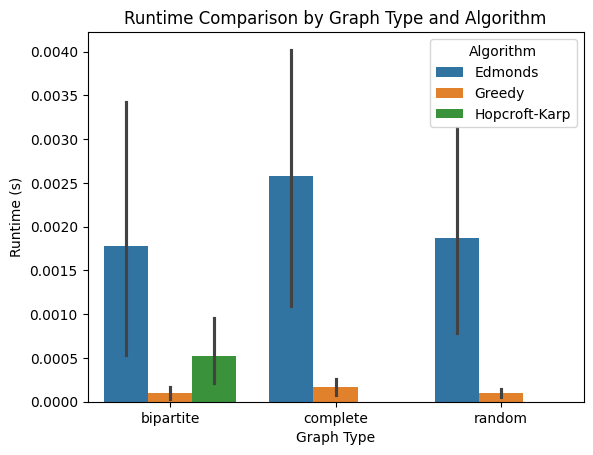

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Compare runtime by algorithm and graph type
sns.barplot(data=df_results, x="Graph Type", y="Runtime (s)", hue="Algorithm")
plt.title("Runtime Comparison by Graph Type and Algorithm")
plt.show()

In [58]:
# Sample results DataFrame
print(df_results.head())

   Graph Type  Size      Algorithm  Matching Size  Is Perfect  Runtime (s)
8   bipartite    10        Edmonds              5        True     0.000453
31  bipartite    10        Edmonds              5        True     0.000271
6   bipartite    10         Greedy              4       False     0.000030
29  bipartite    10         Greedy              5        True     0.000027
7   bipartite    10  Hopcroft-Karp             10       False     0.000393


#Runtime Comparisions for all Graphs (individually)

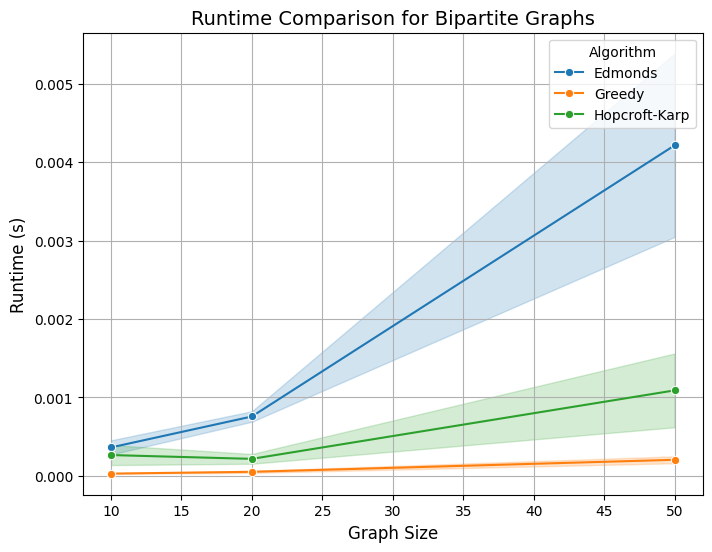

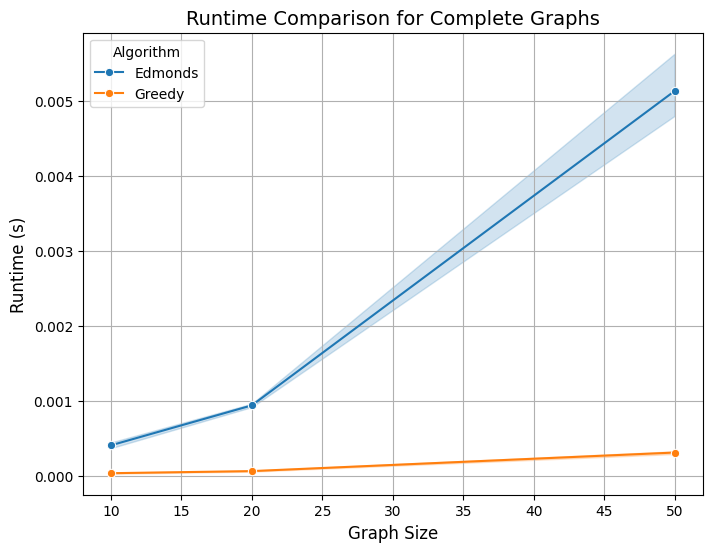

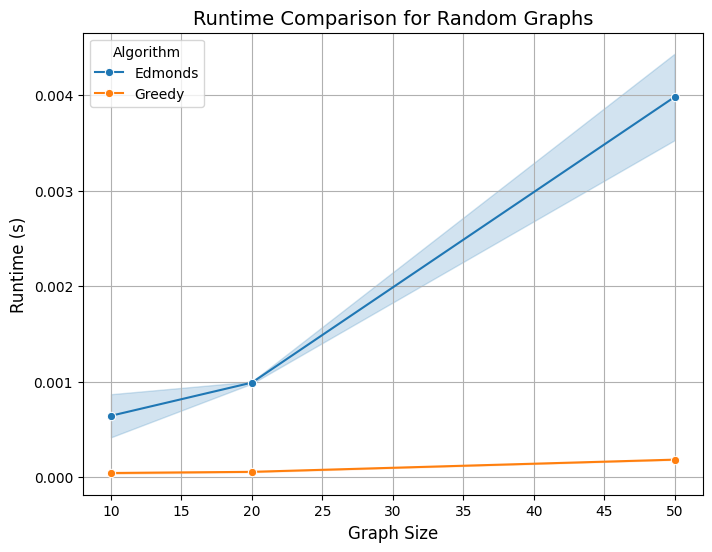

In [62]:
graph_types = df_results["Graph Type"].unique()

for graph_type in graph_types:
    plt.figure(figsize=(8, 6))
    sns.lineplot(
        data=df_results[df_results["Graph Type"] == graph_type],
        x="Size",
        y="Runtime (s)",
        hue="Algorithm",
        marker="o"
    )
    plt.title(f"Runtime Comparison for {graph_type.capitalize()} Graphs", fontsize=14)
    plt.xlabel("Graph Size", fontsize=12)
    plt.ylabel("Runtime (s)", fontsize=12)
    plt.legend(title="Algorithm")
    plt.grid(True)
    plt.show()

In [63]:
for graph_type in graph_types:
    plt.figure(figsize=(8, 6))
    sns.lineplot(
        data=df_results[df_results["Graph Type"] == graph_type],
        x="Size",
        y="Runtime (s)",
        hue="Algorithm",
        marker="o"
    )
    plt.title(f"Runtime Comparison for {graph_type.capitalize()} Graphs", fontsize=14)
    plt.xlabel("Graph Size", fontsize=12)
    plt.ylabel("Runtime (s)", fontsize=12)
    plt.legend(title="Algorithm")
    plt.grid(True)
    plt.savefig(f"runtime_comparison_{graph_type}.png", dpi=300)
    plt.close()

In [64]:
# Save results to CSV
df_results.to_csv("graph_matching_results.csv", index=False)

# Display sorted results
print(df_results.sort_values(["Graph Type", "Size", "Algorithm"]))

   Graph Type  Size      Algorithm  Matching Size  Is Perfect  Runtime (s)
8   bipartite    10        Edmonds              5        True     0.000453
31  bipartite    10        Edmonds              5        True     0.000271
6   bipartite    10         Greedy              4       False     0.000030
29  bipartite    10         Greedy              5        True     0.000027
7   bipartite    10  Hopcroft-Karp             10       False     0.000393
30  bipartite    10  Hopcroft-Karp             10       False     0.000137
11  bipartite    20        Edmonds             10        True     0.000690
34  bipartite    20        Edmonds             10        True     0.000823
9   bipartite    20         Greedy             10        True     0.000064
32  bipartite    20         Greedy             10        True     0.000038
10  bipartite    20  Hopcroft-Karp             20       False     0.000278
33  bipartite    20  Hopcroft-Karp             20       False     0.000154
14  bipartite    50      

#1. Advanced Comparisons

a. Runtime Efficiency by Algorithm Type

- Cumulative Runtime:
Plot cumulative runtime for all algorithms across graph types and sizes to identify scalability trends.

- Efficiency Ratio:
Compare runtimes relative to the fastest algorithm (e.g., Efficiency = (Algorithm Runtime/ Greedy Runtime)).

b. Complexity Validation

- Empirically verify theoretical complexities O(E), O(Sqrt{V}.E), O(V^3) by plotting runtime vs. graph size on a logarithmic scale.

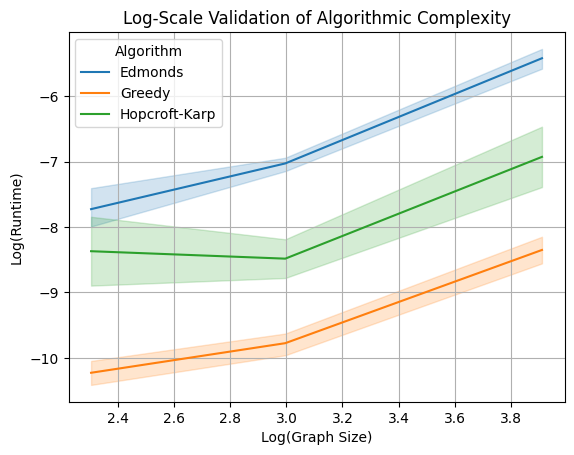

In [65]:
sns.lineplot(
    data=df_results,
    x=np.log(df_results["Size"]),
    y=np.log(df_results["Runtime (s)"]),
    hue="Algorithm"
)
plt.title("Log-Scale Validation of Algorithmic Complexity")
plt.xlabel("Log(Graph Size)")
plt.ylabel("Log(Runtime)")
plt.grid(True)
plt.show()

#2. Quality of Matchings: Matching Size

- Compare the size of matchings produced by each algorithm:
Plot matching size vs. graph size for each graph type.
- Highlight how close the Greedy algorithm's matching size is to the maximum matching found by Hopcroft-Karp or Edmond's.

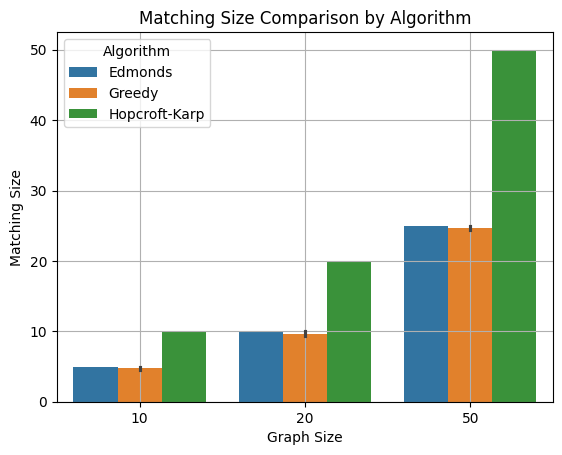

In [66]:
sns.barplot(
    data=df_results,
    x="Size",
    y="Matching Size",
    hue="Algorithm"
)
plt.title("Matching Size Comparison by Algorithm")
plt.xlabel("Graph Size")
plt.ylabel("Matching Size")
plt.legend(title="Algorithm")
plt.grid(True)
plt.show()

#3. Edge Case Analysis

Test specific edge cases:
- Sparse Graphs: Graphs with very few edges.
- Complete Graphs: Fully connected graphs with even and odd numbers of nodes.
- Disconnected Graphs: Graphs where no matching is possible.

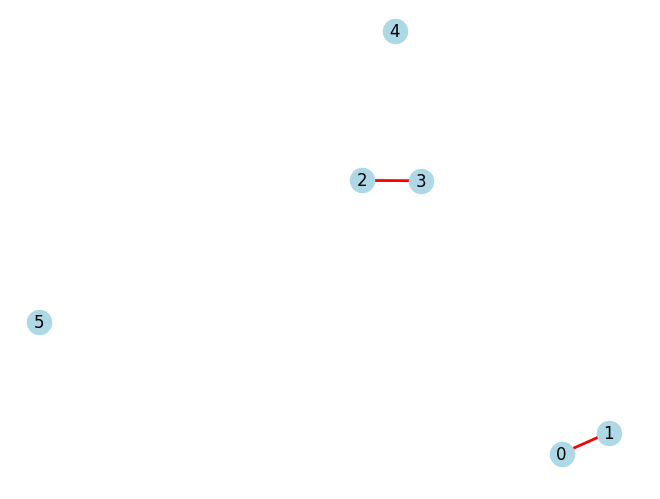

In [70]:
edge_case_graph = generate_random_graph(6, 0.2)  # Example: Sparse graph
draw_graph(edge_case_graph, greedy_matching(edge_case_graph))

#4. Weighted Matchings

Extend the analysis to weighted graphs:
- Assign random weights to edges and evaluate maximum-weight matchings using Edmond's Blossom Algorithm.

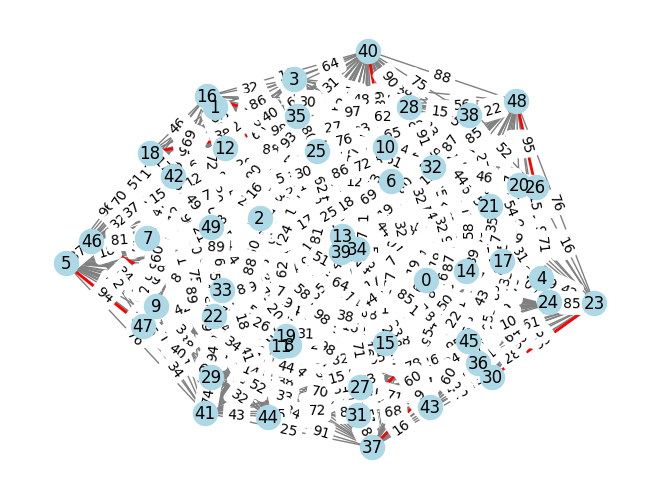

In [71]:
# Add random weights to edges
for u, v in G.edges():
    G[u][v]["weight"] = np.random.randint(1, 100)

# Find maximum-weight matching
weighted_matching = nx.max_weight_matching(G, maxcardinality=True)
draw_graph(G, weighted_matching, edge_labels=nx.get_edge_attributes(G, "weight"))